# COVID-19 analysis report
 
In this notebook we are analysing the COVID-19 dataset created by Johns Hopkins University. Several questions are answered along the report using Python to get insights from the dataset.

In [2]:
# Import libraries
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
# Load dataset to a dataframe
df = pd.read_csv("covid19.csv")

## 1. First overview

In this chapter we do the first overview of the dataset.

#### **Check the head, tail and shape of the dataset**

In [4]:
df.head(5)

Country/Region Date (yyyy/mm/dd)  Confirmed cases  Death cases  \
0    Afghanistan        2020-01-22                0            0   
1    Afghanistan        2020-01-23                0            0   
2    Afghanistan        2020-01-24                0            0   
3    Afghanistan        2020-01-25                0            0   
4    Afghanistan        2020-01-26                0            0   

   Recovered cases  
0                0  
1                0  
2                0  
3                0  
4                0

In [5]:
df.tail(5)

Country/Region Date (yyyy/mm/dd)  Confirmed cases  Death cases  \
68923       Zimbabwe        2021-01-10            21477          507   
68924       Zimbabwe        2021-01-11            22297          528   
68925       Zimbabwe        2021-01-12            23239          551   
68926       Zimbabwe        2021-01-13            24256          589   
68927       Zimbabwe        2021-01-14            25368          636   

       Recovered cases  
68923            12582  
68924            13213  
68925            13396  
68926            13658  
68927            14714

#### **Q1. What are the columns of the dataset?**

In [6]:
df.columns

Index(['Country/Region', 'Date (yyyy/mm/dd)', 'Confirmed cases', 'Death cases',
       'Recovered cases'],
      dtype='object')

##### **Q1.1. Rename the columns of the dataset to make it easier to work with.**
Use the follow dictionary to rename the columns:
```
{'Country/Region': 'country',
 'Date (yyyy/mm/dd)': 'date',
 'Confirmed cases': 'confirmed',
 'Death cases': 'deaths',
 'Recovered cases': 'recovered'
}
```

In [7]:
df = df.rename(columns={'Country/Region': 'country',
 'Date (yyyy/mm/dd)': 'date',
 'Confirmed cases': 'confirmed',
 'Death cases': 'deaths',
 'Recovered cases': 'recovered'
})

#### **Q2. What is the type of each column of the dataset?**

In [8]:
df.dtypes

country      object
date         object
confirmed     int64
deaths        int64
recovered     int64
dtype: object

##### **Q2.1. Change the type of the 'date' column to datetime.**

In [9]:
df["date"] = pd.to_datetime(df["date"])

df.dtypes

country              object
date         datetime64[ns]
confirmed             int64
deaths                int64
recovered             int64
dtype: object

#### **Q3. Do we have "nulls" in the dataset?**

In [10]:
df.isnull().sum()

country      0
date         0
confirmed    0
deaths       0
recovered    0
dtype: int64

#### **Q4. How many countries do we have represented in the dataset?**

In [11]:
df['country'].nunique()

192

#### **Q5. What is the first and the last 'date' of the dataset?**

In [12]:
df['date'].max()

Timestamp('2021-01-14 00:00:00')

In [13]:
df['date'].min()

Timestamp('2020-01-22 00:00:00')

## 2. Data Analysis: Worldwide
Time to make some worldwide analysis looking at global metrics and comparing countries.

#### **Q6. We checked before that we have data for 'confirmed', 'recovered' and 'deaths' cases but something is missing... Add the column for 'active' cases to the dataset.**

In [14]:
df['active'] = df['confirmed'] - df['deaths'] - df['recovered']

#### **Q7. Create a dataset that have the cumulative ACTIVE cases worldwide per day.**

In [15]:
total_cases = df.groupby('date')['active'].sum()
total_cases.head()

date
2020-01-22     510
2020-01-23     605
2020-01-24     876
2020-01-25    1349
2020-01-26    2006
Name: active, dtype: int64

![showtime](https://media.giphy.com/media/13ZVRnWnmSMaRy/giphy.gif)

***IT'S SHOOOOOOW TIME***

#### **Q8. Plot the curve with the evolution of the active cases worlwide.**

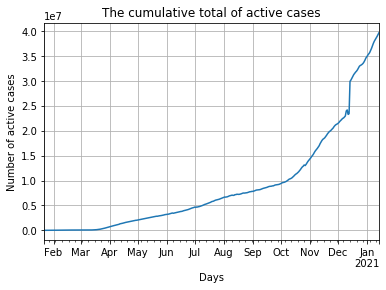

In [16]:
total_cases.plot()
plt.title('The cumulative total of active cases')
plt.ylabel('Number of active cases')
plt.grid()
plt.xlabel('Days')
plt.show()

#### **Q9. Get the top 10 countries by confirmed cases and plot a bar chart with the top 10 countries with more confirmed cases.**
> **Hint**: You can filter the dataset by the latest day of the dataset (it has the number of confirmed cases in each country). Then sort the values by 'confirmed' and use `head(10)` to get the top 10.

In [17]:
last_date_values = df[df['date'] == df['date'].max()]
last_values_top10 = last_date_values.sort_values(by='confirmed', ascending = False).head(10)
last_values_top10

country       date  confirmed  deaths  recovered    active
64260              US 2021-01-14   23314521  388697          0  22925824
28719           India 2021-01-14   10527683  151918   10162738    213027
8615           Brazil 2021-01-14    8324294  207095    7394739    722460
51336          Russia 2021-01-14    3459237   63016    2851737    544484
65696  United Kingdom 2021-01-14    3269757   86163       7580   3176014
22616          France 2021-01-14    2909723   69452     212728   2627543
63901          Turkey 2021-01-14    2364801   23495    2236938    104368
30873           Italy 2021-01-14    2336279   80848    1694051    561380
58516           Spain 2021-01-14    2211967   53079     150376   2008512
24052         Germany 2021-01-14    2015235   45207    1661394    308634

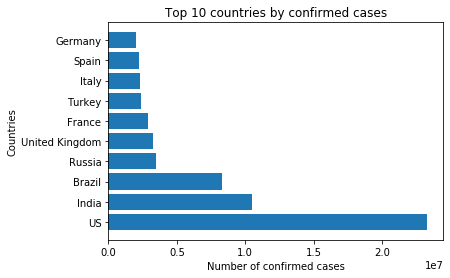

In [18]:
plt.barh(last_values_top10['country'], last_values_top10['confirmed'])
plt.xlabel('Number of confirmed cases')
plt.ylabel('Countries')
plt.title('Top 10 countries by confirmed cases')
plt.show()

#### **Q10. Calculate the recovery percentage and mortality rate for each country in latest day**

> **Hint:** Create a dataset with just the last date and create a column for each of the ratios we want:

In [19]:
rates = df[df['date'] == df['date'].max()]
rates['recovery percentage'] =  (rates['recovered'] / rates['confirmed']) * 100
rates['mortality rate'] =  (rates['deaths'] / rates['confirmed']) * 100
rates

country       date  confirmed  deaths  recovered  active  \
358           Afghanistan 2021-01-14      53775    2314      45298    6163   
717               Albania 2021-01-14      65994    1261      39246   25487   
1076              Algeria 2021-01-14     103127    2822      69992   30313   
1435              Andorra 2021-01-14       8868      88       8091     689   
1794               Angola 2021-01-14      18613     425      16008    2180   
...                   ...        ...        ...     ...        ...     ...   
67491             Vietnam 2021-01-14       1531      35       1369     127   
67850  West Bank and Gaza 2021-01-14     150505    1665     136247   12593   
68209               Yemen 2021-01-14       2110     612       1419      79   
68568              Zambia 2021-01-14      32800     514      22504    9782   
68927            Zimbabwe 2021-01-14      25368     636      14714   10018   

       recovery percentage  mortality rate  
358              84.236169        4.303115  
717              59.469043        1.910780  
1076             67.869714        2.736432  
1435             91.238160        0.992332  
1794             86.004406        2.283350  
...                    ...             ...  
67491            89.418681        2.286088  
67850            90.526561        1.106276  
68209            67.251185       29.004739  
68568            68.609756        1.567073  
68927            58.002208        2.507096  

[192 rows x 8 columns]

![](https://media.giphy.com/media/rbaC8w0QY1vGw/giphy.gif)

##### **POLYGRAPH TIME!!!**

> ***BREAKING NEWS:***
> 
> *Netherlands has the highest recovery percentage in the world!*


##### **Q10.1. Is this a fake news?**

In [20]:
rates.sort_values(by = 'recovery percentage', ascending = False).head()

country       date  confirmed  deaths  recovered  active  \
34463              Laos 2021-01-14         41       0         41       0   
66773           Vanuatu 2021-01-14          1       0          1       0   
40207  Marshall Islands 2021-01-14          4       0          4       0   
53131             Samoa 2021-01-14          2       0          2       0   
56003         Singapore 2021-01-14      59029      29      58757     243   

       recovery percentage  mortality rate  
34463            100.00000        0.000000  
66773            100.00000        0.000000  
40207            100.00000        0.000000  
53131            100.00000        0.000000  
56003             99.53921        0.049128

Timor-Leste has the highest recovery percentage in the world!

BOOOOOM, ONE MORE FAKE NEWS!! We hate those!!

## 3. Data analysis - Country: Germany
From now on, we'll only analyse Germany.

For this chapter consider the following values of population (you need the value for your country population to make a further question):

In [21]:
population = {'US': 331002651,
              'Spain': 46754778,
              'Italy': 60461826,
              'Portugal': 10196709,
              'United Kingdom': 67886011,
              'Germany': 83783942,
              'Norway': 5421241,
              'Belgium': 11589623,
              'Netherlands': 17134872}

#### **Q11. Get a dataset that contains only information regarding your country.**

In [22]:
my_country = 'Germany'
my_country_population = population[my_country]
my_country_df = df[df.country == my_country]

In [23]:
my_country_df.head()

country       date  confirmed  deaths  recovered  active
23694  Germany 2020-01-22          0       0          0       0
23695  Germany 2020-01-23          0       0          0       0
23696  Germany 2020-01-24          0       0          0       0
23697  Germany 2020-01-25          0       0          0       0
23698  Germany 2020-01-26          0       0          0       0

#### **Q12. Create a dataset that only contains information since the day that was registered the first case in your country. Tell us what is that day and how many cases were registered in that day?**

In [24]:
my_country_df = my_country_df[my_country_df.confirmed > 0]
my_country_df[my_country_df.date == my_country_df.date.min()]

country       date  confirmed  deaths  recovered  active
23699  Germany 2020-01-27          1       0          0       1

#### **Q13. Get a column with the confirmed cases in proportion to 1M of the population.**

In [25]:
my_country_df['confirmed_pop'] = ((my_country_df['confirmed'] / my_country_population) * 1000000)
my_country_df.head()

country       date  confirmed  deaths  recovered  active  confirmed_pop
23699  Germany 2020-01-27          1       0          0       1       0.011935
23700  Germany 2020-01-28          4       0          0       4       0.047742
23701  Germany 2020-01-29          4       0          0       4       0.047742
23702  Germany 2020-01-30          4       0          0       4       0.047742
23703  Germany 2020-01-31          5       0          0       5       0.059677

#### **Q14. Get a column that register the number of days since the first case was registered per country.**

In [26]:
my_country_df['days'] = (my_country_df.date - my_country_df.date.min()).dt.days
my_country_df.head()

country       date  confirmed  deaths  recovered  active  \
23699  Germany 2020-01-27          1       0          0       1   
23700  Germany 2020-01-28          4       0          0       4   
23701  Germany 2020-01-29          4       0          0       4   
23702  Germany 2020-01-30          4       0          0       4   
23703  Germany 2020-01-31          5       0          0       5   

       confirmed_pop  days  
23699       0.011935     0  
23700       0.047742     1  
23701       0.047742     2  
23702       0.047742     3  
23703       0.059677     4

![showtime](https://media.giphy.com/media/fxqt51CAMGITJlxcRI/giphy.gif)

***IT'S SHOOOOOOW TIME***

#### **Q15. Plot the cruve with evolution of confirmed cases per 1M of population since the 1st case for your country**

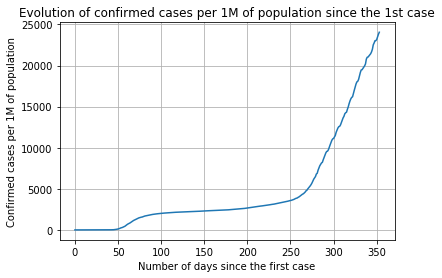

In [27]:
plt.plot(my_country_df.days, my_country_df.confirmed_pop)

plt.grid()
plt.xlabel('Number of days since the first case')
plt.ylabel('Confirmed cases per 1M of population')
plt.title('Evolution of confirmed cases per 1M of population since the 1st case')
plt.show()

#### **Q16. How does your country compares in terms of confirmed cases to others?**

Just run the code below and analyze the chart. Compare your country with others.

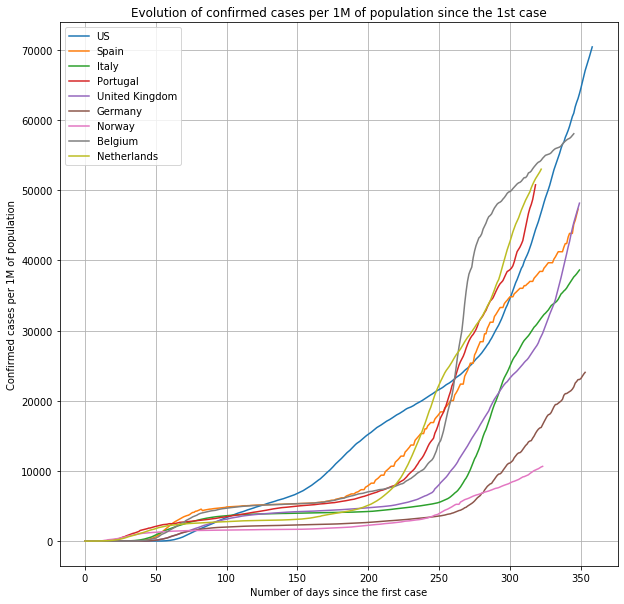

In [28]:
# Run this cell:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

population_plot = {'US': 331002651,'Spain': 46754778,'Italy': 60461826,'Portugal': 10196709,
                   'United Kingdom': 67886011,'Germany': 83783942,'Norway': 5421241,
                   'Belgium': 11589623,'Netherlands': 17134872,'Sweden': 10086360}

df_thorly = pd.read_csv('covid19.csv')
df_thorly['Date (yyyy/mm/dd)'] = pd.to_datetime(df_thorly['Date (yyyy/mm/dd)'])
plt.figure(figsize=(10,10))

for country in population:
  country_df = df_thorly[df_thorly['Country/Region'] == country]
  country_df = country_df[country_df['Confirmed cases'] > 0]
  country_df['confirmed_pop'] = ((country_df['Confirmed cases'] / population_plot[country]) * 1000000)
  country_df['days'] = (country_df['Date (yyyy/mm/dd)'] - country_df['Date (yyyy/mm/dd)'].min()).dt.days

  plt.plot(country_df.days, country_df.confirmed_pop, label = country)

plt.legend()
plt.grid()
plt.xlabel('Number of days since the first case')
plt.ylabel('Confirmed cases per 1M of population')
plt.title('Evolution of confirmed cases per 1M of population since the 1st case')
plt.show()

![](https://media.giphy.com/media/rbaC8w0QY1vGw/giphy.gif)

##### **POLYGRAPH TIME!!!**

> ***BREAKING NEWS:***
> 
> *Belgium is the country (among the countries presented on the chart) with the highest number of cases by 1M population!*


##### **Q16.1. Is this a fake news?**

WOOOOOW - A LEGIT NEWS! We like that!

![](https://media.giphy.com/media/lD76yTC5zxZPG/giphy.gif)